In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

In [2]:
my_url = "https://www.flipkart.com/search?q=iphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=popularity"
load_url = urlopen(my_url)
page_html = load_url.read()
load_url.close()
page_soup = soup(page_html,"html.parser")

In [3]:
containers = page_soup.findAll("div",{"class":"_2kHMtA"})
print(len(containers))

24


In [4]:
# print(soup.prettify(containers[0]))

In [5]:
container = containers[0]

print(container.div.img["alt"])

APPLE iPhone SE (Black, 64 GB)


In [6]:
price = container.findAll("div",{"class":"col col-5-12 nlI3QM"})[0].text
print(price)

₹32,999₹39,900₹6901 offUpto ₹15,300 Off on Exchange


In [7]:
p = price
print(p)

₹32,999₹39,900₹6901 offUpto ₹15,300 Off on Exchange


In [8]:
def price_sep(price):
    price = price.split("₹")[1]
    net = "".join(price.split(","))
    pr = int(net)
    # print(type(pr))
    return pr
# def price_sep(price):
#     price = price.split("₹")
#     print(price[1])
#     comma_sep(price[1])


In [9]:
# a = price[0].text
net = price_sep(price)
print(net)
# print(p)

32999


In [10]:
def extract_rating(rating_details):
    rnno = rating_details.split(' ')[0]
    rnno = rnno.split(",")
    rating = float(rnno[0])
    rn = rnno[1:]
    num_rating = "".join(rn)
    # num_rating = int(num_rating)
    return (rating, num_rating)

# Rating Scrapping

In [11]:
rating = container.findAll("div",{"class":"gUuXy-"})
print(rating[0].text)

4.51,07,412 Ratings & 9,125 Reviews


In [12]:
rate = rating[0].text
rate, num_rate = extract_rating(rate)
print(rate, num_rate)

4.51 07412


In [23]:
filename = "iphone.csv"
f = open(filename,"w")


In [24]:
headers = "Product_name,Price(in_rupees),Rating,No_of_rating\n"
f.write(headers)

50

In [25]:
for container in containers:
    product = container.div.img["alt"]
    
    price_container = container.findAll("div",{"class":"col col-5-12 nlI3QM"})
    price = price_sep(price_container[0].text)
    
    rating_container = container.findAll("div",{"class":"gUuXy-"})
    rating = rating_container[0].text
    rate, num_rate = extract_rating(rating)
    
    print("Product_Name:"+product)
    print("Price(in_rupees):{0}".format(price))
    print("Rating:{0}".format(rate))
    print("No. of Rating:{0}".format(num_rate))
    print("\n\n")
    f.write(product.replace(',','|') + ',' + str(price) + ',' + str(rate) + ',' + str(num_rate) + '\n')
    

Product_Name:APPLE iPhone SE (Black, 64 GB)
Price(in_rupees):32999
Rating:4.51
No. of Rating:07412



Product_Name:Apple iPhone XR ((PRODUCT)RED, 64 GB) (Includes EarPods, Power Adapter)
Price(in_rupees):41999
Rating:4.69
No. of Rating:622



Product_Name:APPLE iPhone SE (White, 64 GB)
Price(in_rupees):32999
Rating:4.51
No. of Rating:07412



Product_Name:Apple iPhone XR (Black, 128 GB) (Includes EarPods, Power Adapter)
Price(in_rupees):46999
Rating:4.69
No. of Rating:622



Product_Name:APPLE iPhone 11 (Black, 64 GB)
Price(in_rupees):51999
Rating:4.667
No. of Rating:861



Product_Name:APPLE iPhone SE (Red, 64 GB)
Price(in_rupees):32999
Rating:4.51
No. of Rating:07412



Product_Name:Apple iPhone XR (White, 128 GB) (Includes EarPods, Power Adapter)
Price(in_rupees):46999
Rating:4.69
No. of Rating:622



Product_Name:APPLE iPhone 12 Mini (White, 128 GB)
Price(in_rupees):72900
Rating:4.51
No. of Rating:988



Product_Name:APPLE iPhone 12 (Blue, 64 GB)
Price(in_rupees):77900
Rating:4.64


In [26]:
f.close()

In [27]:
import pandas as pd
data = pd.read_csv(r"C:\\Users\\Deepak\\Documents\\OPPS ASSIGNMENT\\General Programming\\iphone.csv")

In [39]:
data["No_of_rating"] = data["No_of_rating"].fillna(0)

In [40]:
data

,Product_name,Price(in_rupees),Rating,No_of_rating
0,APPLE iPhone SE (Black| 64 GB),32999,4.5100,7412.0
1,Apple iPhone XR ((PRODUCT)RED| 64 GB) (Include...,41999,4.6900,622.0
2,APPLE iPhone SE (White| 64 GB),32999,4.5100,7412.0
3,Apple iPhone XR (Black| 128 GB) (Includes EarP...,46999,4.6900,622.0
4,APPLE iPhone 11 (Black| 64 GB),51999,4.6670,861.0
5,APPLE iPhone SE (Red| 64 GB),32999,4.5100,7412.0
6,Apple iPhone XR (White| 128 GB) (Includes EarP...,46999,4.6900,622.0
7,APPLE iPhone 12 Mini (White| 128 GB),72900,4.5100,988.0
8,APPLE iPhone 12 (Blue| 64 GB),77900,4.6400,365.0
9,APPLE iPhone 12 (White| 128 GB),82900,4.6400,365.0


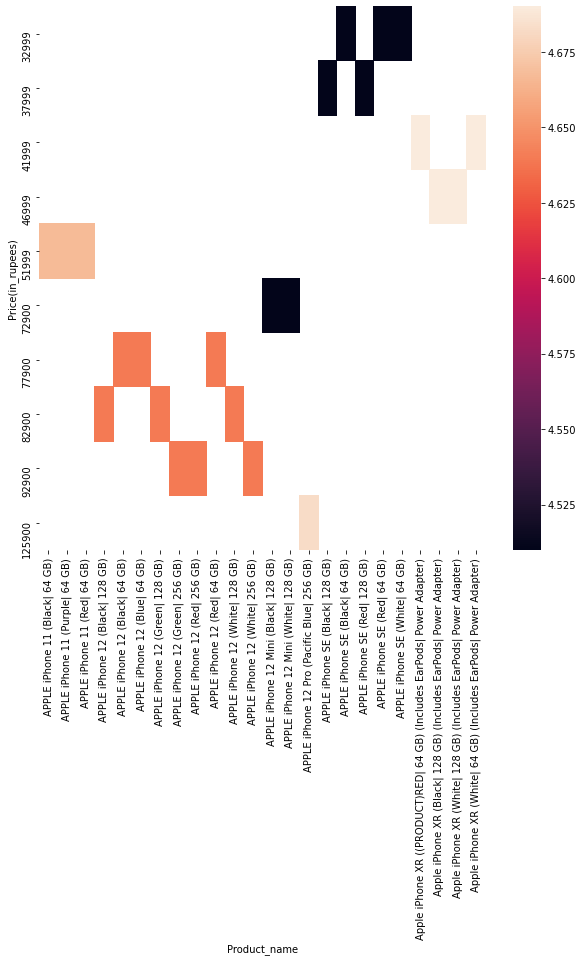

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# iphones = sns.load_dataset(data)
a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)
iphones = data.pivot("Price(in_rupees)","Product_name", "Rating")
ax = sns.heatmap(iphones, ax = ax)